# 猫狗大战

这个项目使用tensorflow 1.0 + gpu环境

In [1]:
import tensorflow as tf
from imp import reload
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import random
import os
import traceback
import time
import sys

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import image_process
image_process = reload(image_process)

def img_show(imgs, labs):
    size = min(len(imgs), 10)
    fig = plt.figure(figsize=(20, 20))
    for i in range(0, size):
        fig.add_subplot(1, size, i + 1) 
        plt.imshow( imgs[i] + .5 )  # display it
        plt.xlabel( labs[i] )

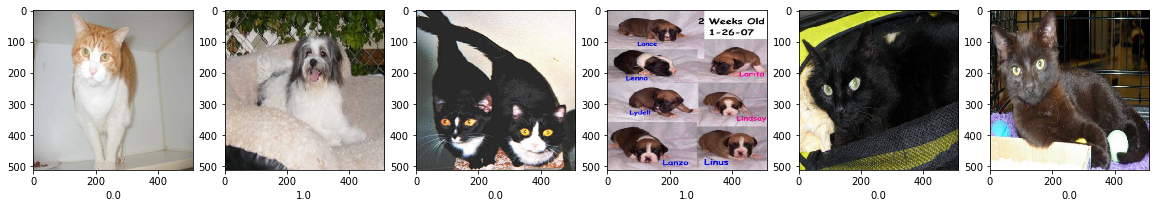

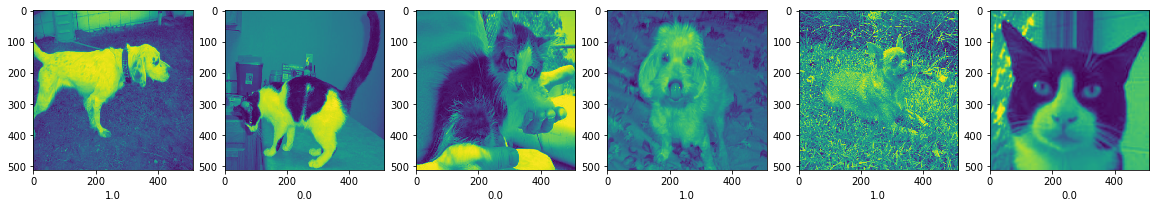

In [2]:
# 列出数据集里的图 
train, vali, test = image_process.read_data_sets('./', batch_size=6)
img_show(*next(train))
# 灰度
train, vali, test = image_process.read_data_sets('./', batch_size=6, gray=True)
img_show(*next(train))

# 使用线性分类 (可跳过执行）

In [128]:
image_process = reload(image_process)
# 重新加载数据集
%time train, vali, test = image_process.read_data_sets('./', batch_size=128)
%time vali_dat, vali_lab = next(vali)
vali_dat = vali_dat.reshape(-1, 512 * 512 * 3)

from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(penalty='elasticnet', loss='log')

start = time.time()
try:
    while(True):
        dat, lab = next(train)
        dat = dat.reshape(-1, 512 * 512 * 3)
        clf.partial_fit(dat, lab, [0,1])
        sys.stdout.write('\rscore:' + str(clf.score(vali_dat, vali_lab)))
except Exception as e:
    print('\nend', e, traceback.format_exc(), str(time.time() - start), 's')
    pass

Wall time: 393 ms
Wall time: 2.71 s
score:0.5703125
end  Traceback (most recent call last):
  File "<ipython-input-128-d4ae035b9f91>", line 14, in <module>
    dat, lab = next(train)
StopIteration
 170.8678240776062 s


In [129]:
from sklearn.metrics import accuracy_score
train, vali, test = image_process.read_data_sets('./', batch_size=500)
vali_dat, vali_lab = next(vali)
vali_dat = vali_dat.reshape(-1, 512 * 512 * 3)

y_pred = clf.predict(vali_dat)
vali_lab = vali_lab.reshape(-1)
accuracy_score(vali_lab, y_pred)

0.54000000000000004

# 使用深度学习

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

# 重新加载数据集
%time train, vali, test = image_process.read_data_sets('./', batch_size=128)

model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same',
                        input_shape=[512,512,3]))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit_generator(train, 25000, 100, validation_data=vali, nb_val_samples=32)

Using TensorFlow backend.


Wall time: 357 ms
Epoch 1/100


AttributeError: module 'tensorflow' has no attribute 'keras'